In [86]:
from tqdm import tqdm
from tqdm.contrib.itertools import product

from retsupp.utils.data import Subject, get_subject_ids, get_retinotopic_labels
from itertools import product
from pathlib import Path
import pandas as pd




bids_folder = Path('/data/ds-retsupp')

roi_order = get_retinotopic_labels().values()

In [87]:
df = []

subject_models = list(product(get_subject_ids(), [4, 6]))
keys = []

for subject, model in tqdm(subject_models):

    # sub-01_model-4_prf_voxels.tsv
    # /Users/gdehol/data/ds-retsupp/derivatives/prf_summaries/model4/sub-01/sub-01_model-4_prf_voxels.tsv
    fn = bids_folder / 'derivatives' / 'prf_summaries' / f'model{model}' / f'sub-{subject}' / f'sub-{subject}_model-{model}_prf_voxels.tsv'
    try:
        sub_df = pd.read_csv(fn, sep='\t')
        df.append(sub_df)
        keys.append((subject, model))
    except FileNotFoundError: 
        print(f'File not found: {fn}')
        continue

df = pd.concat(df, keys=keys, names=['subject', 'model'])

100%|██████████| 52/52 [00:00<00:00, 67.31it/s]

File not found: /data/ds-retsupp/derivatives/prf_summaries/model6/sub-20/sub-20_model-6_prf_voxels.tsv
File not found: /data/ds-retsupp/derivatives/prf_summaries/model4/sub-28/sub-28_model-4_prf_voxels.tsv
File not found: /data/ds-retsupp/derivatives/prf_summaries/model6/sub-28/sub-28_model-6_prf_voxels.tsv
File not found: /data/ds-retsupp/derivatives/prf_summaries/model4/sub-29/sub-29_model-4_prf_voxels.tsv
File not found: /data/ds-retsupp/derivatives/prf_summaries/model6/sub-29/sub-29_model-6_prf_voxels.tsv


In [88]:
df = df[df['r2'] > 0.1]

In [89]:


df['roi1'] = df['roi'].str.split('_').str[0]


df['roi1'] = df['roi1'].map({'LO1':'LO', 'LO2':'LO', 'TO1':'TO', 'TO2':'TO', 'VO1':'VO', 'VO2':'VO', 'V3A':'V3AB', 'V3B':'V3AB'}).fillna(df['roi1'])

roi_order = ['V1', 'V2', 'V3', 'V3AB', 'hV4', 'LO', 'LO', 'TO', 'VO',]

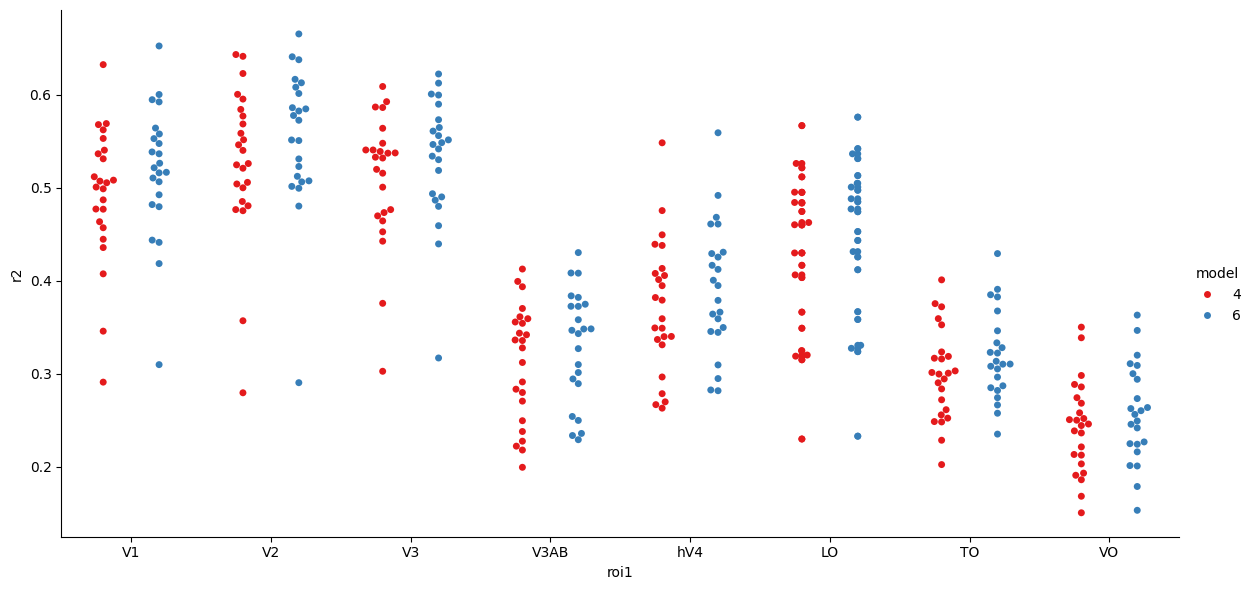

In [90]:
import seaborn as sns
sns.catplot(x='roi1', y='r2', hue='model', data=df.groupby(['subject', 'roi1', 'model'])[['r2']].mean().reset_index(), kind='swarm', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

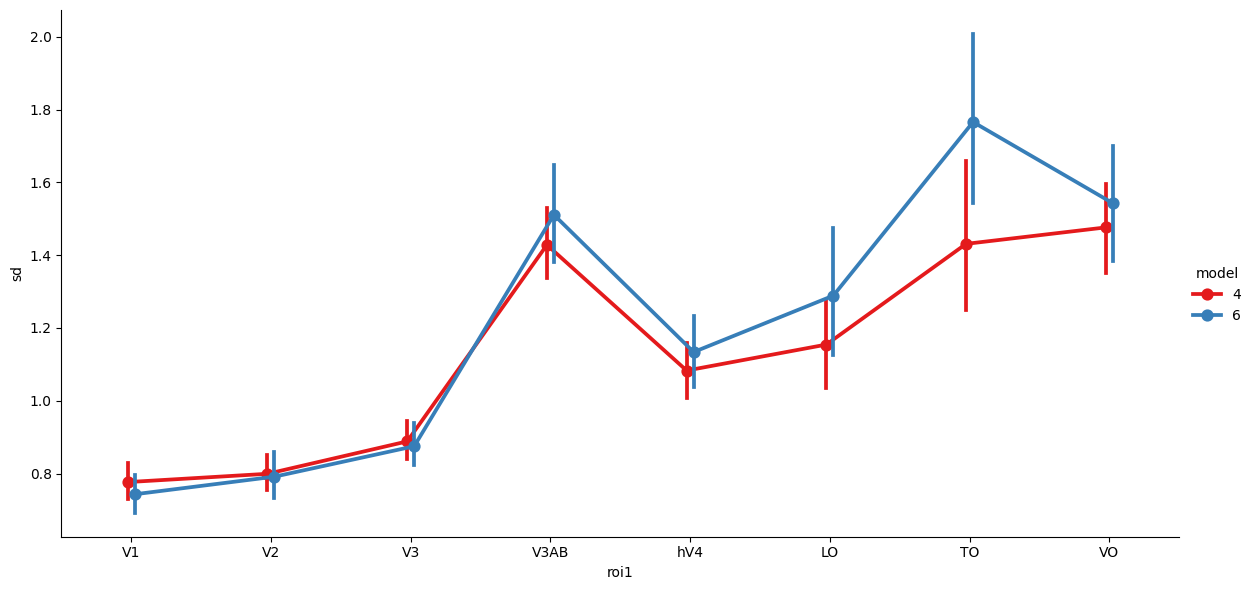

In [91]:
sns.catplot(x='roi1', y='sd', hue='model', data=df.groupby(['subject', 'roi1', 'model',])[['sd']].mean().reset_index(), kind='point', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

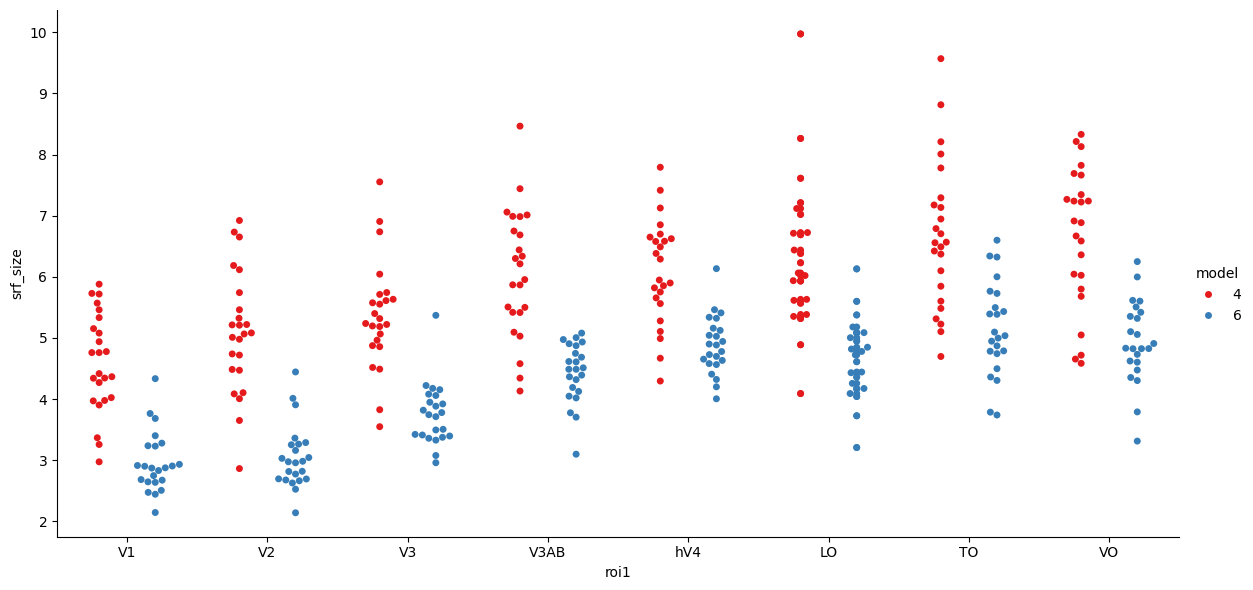

In [92]:
sns.catplot(x='roi1', y='srf_size', hue='model', data=df.groupby(['subject', 'roi1', 'model',])[['srf_size']].mean().reset_index(), kind='swarm', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

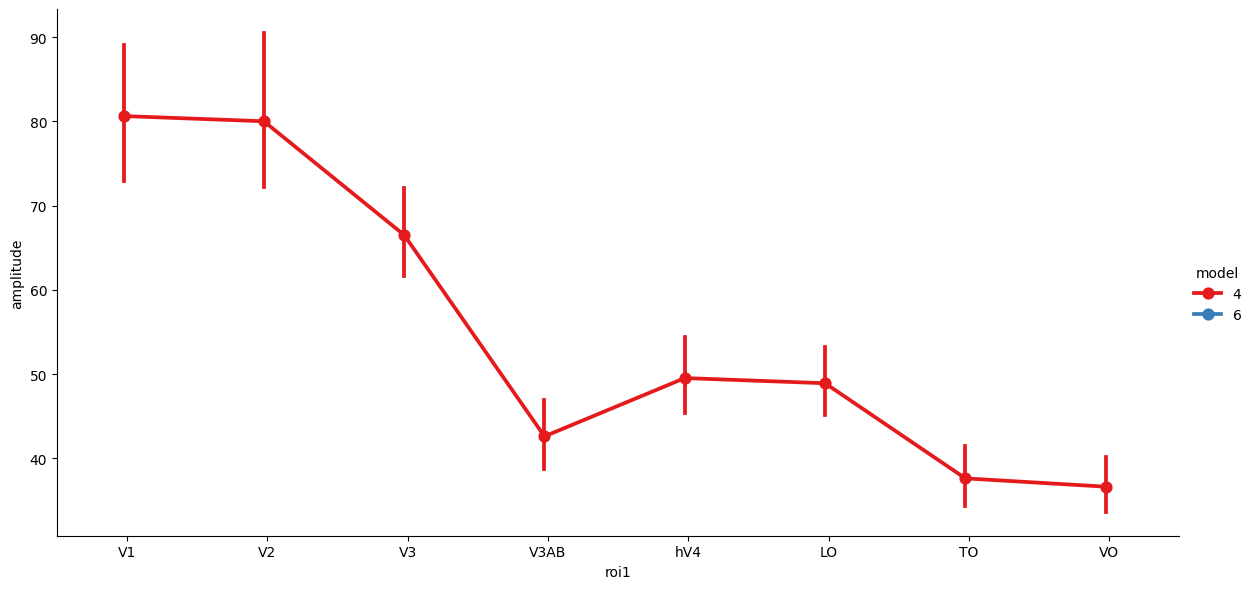

In [93]:
sns.catplot(x='roi1', y='amplitude', hue='model', data=df.groupby(['subject', 'roi1', 'model',])[['amplitude']].mean().reset_index(), kind='point', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

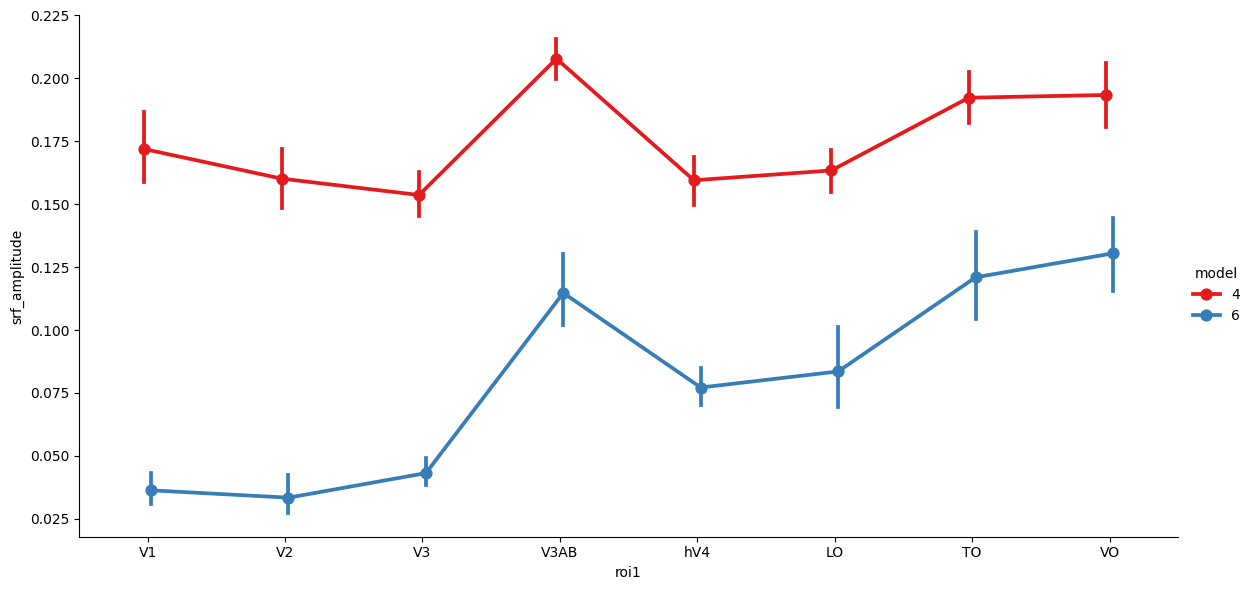

In [94]:
sns.catplot(x='roi1', y='srf_amplitude', hue='model', data=df.groupby(['subject', 'roi1', 'model',])[['srf_amplitude']].mean().reset_index(), kind='point', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

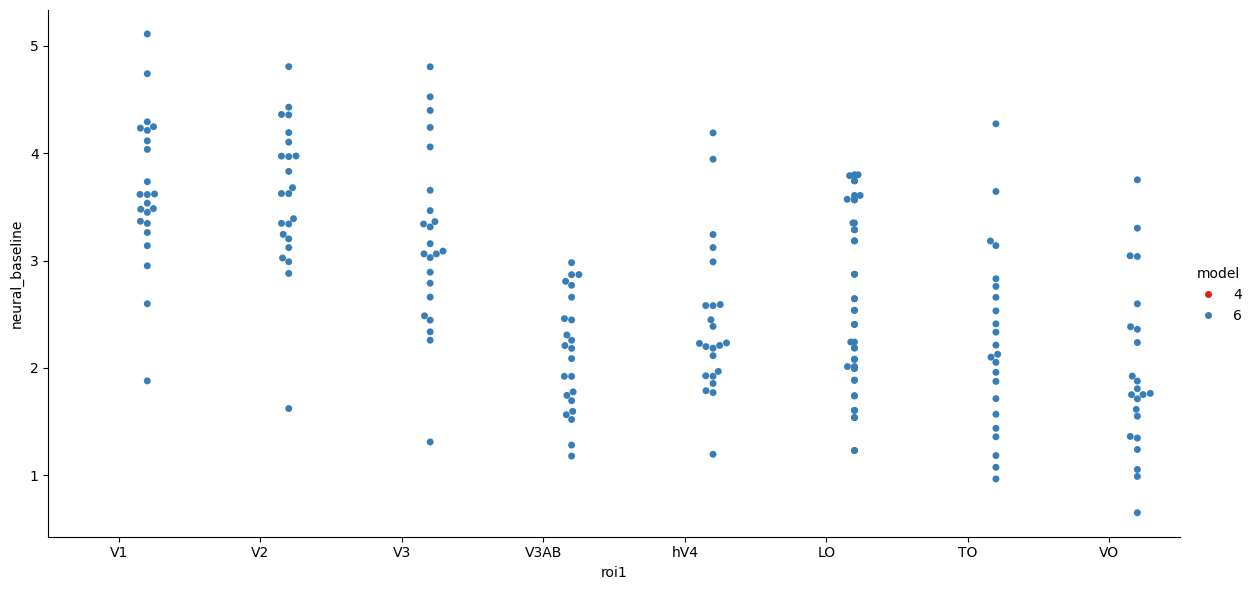

In [95]:
sns.catplot(x='roi1', y='neural_baseline', hue='model', data=df.groupby(['subject', 'roi1', 'model',])[['neural_baseline']].mean().reset_index(), kind='swarm', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

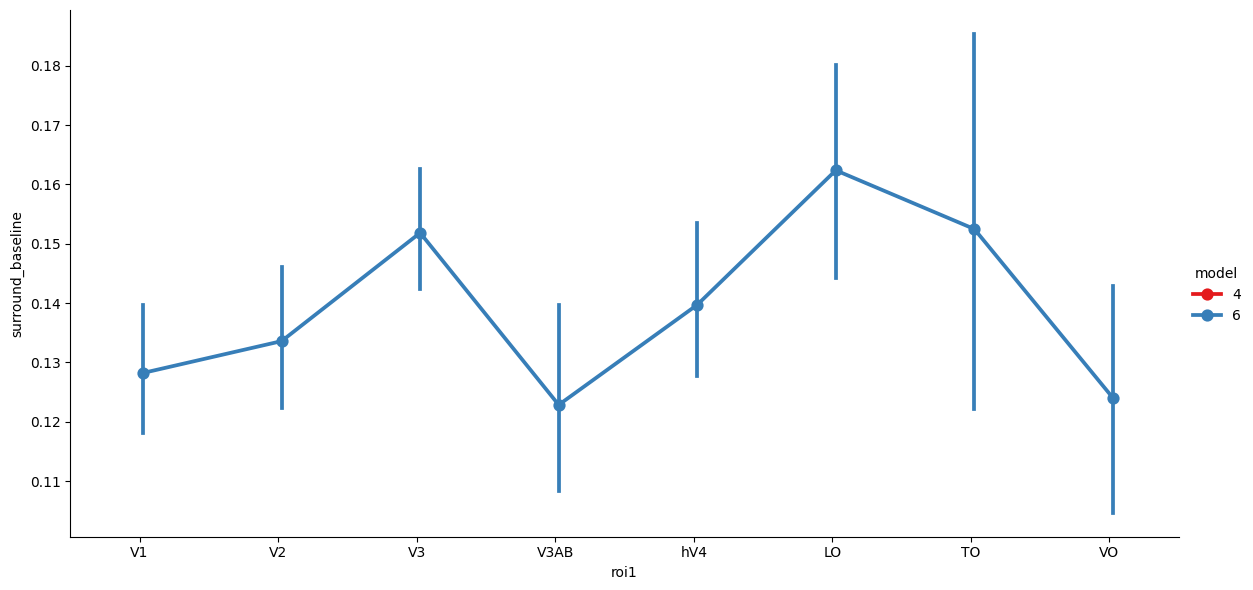

In [96]:
sns.catplot(x='roi1', y='surround_baseline', hue='model', data=df.groupby(['subject', 'roi1', 'model',])[['surround_baseline']].mean().reset_index(), kind='point', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

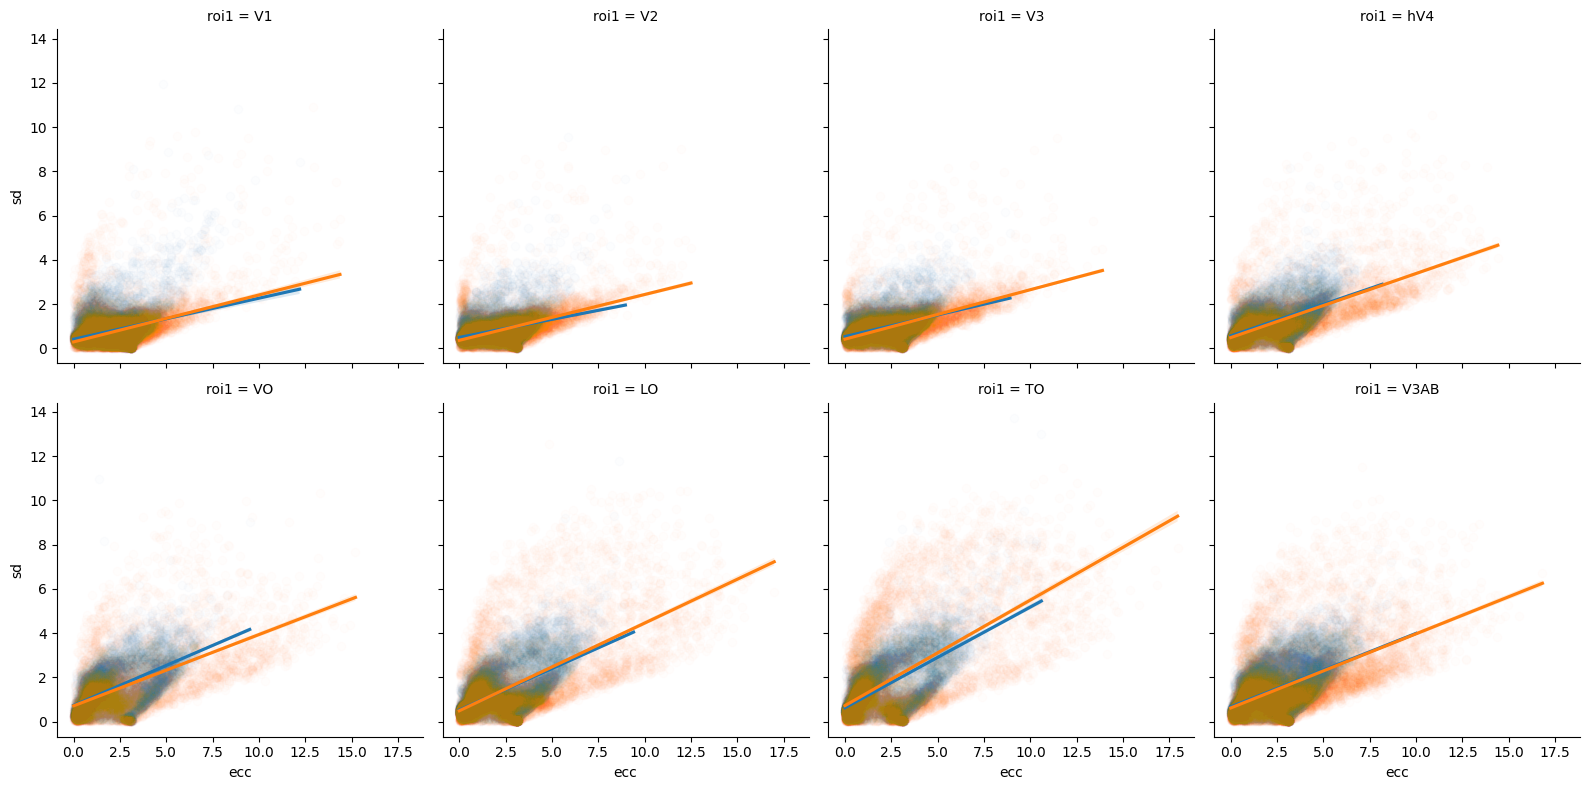

In [97]:
g = sns.FacetGrid(df.reset_index(), col="roi1", hue="model", height=4, aspect=1, col_wrap=4)

g.map(sns.regplot, "ecc", "sd", scatter_kws={'alpha':0.01})

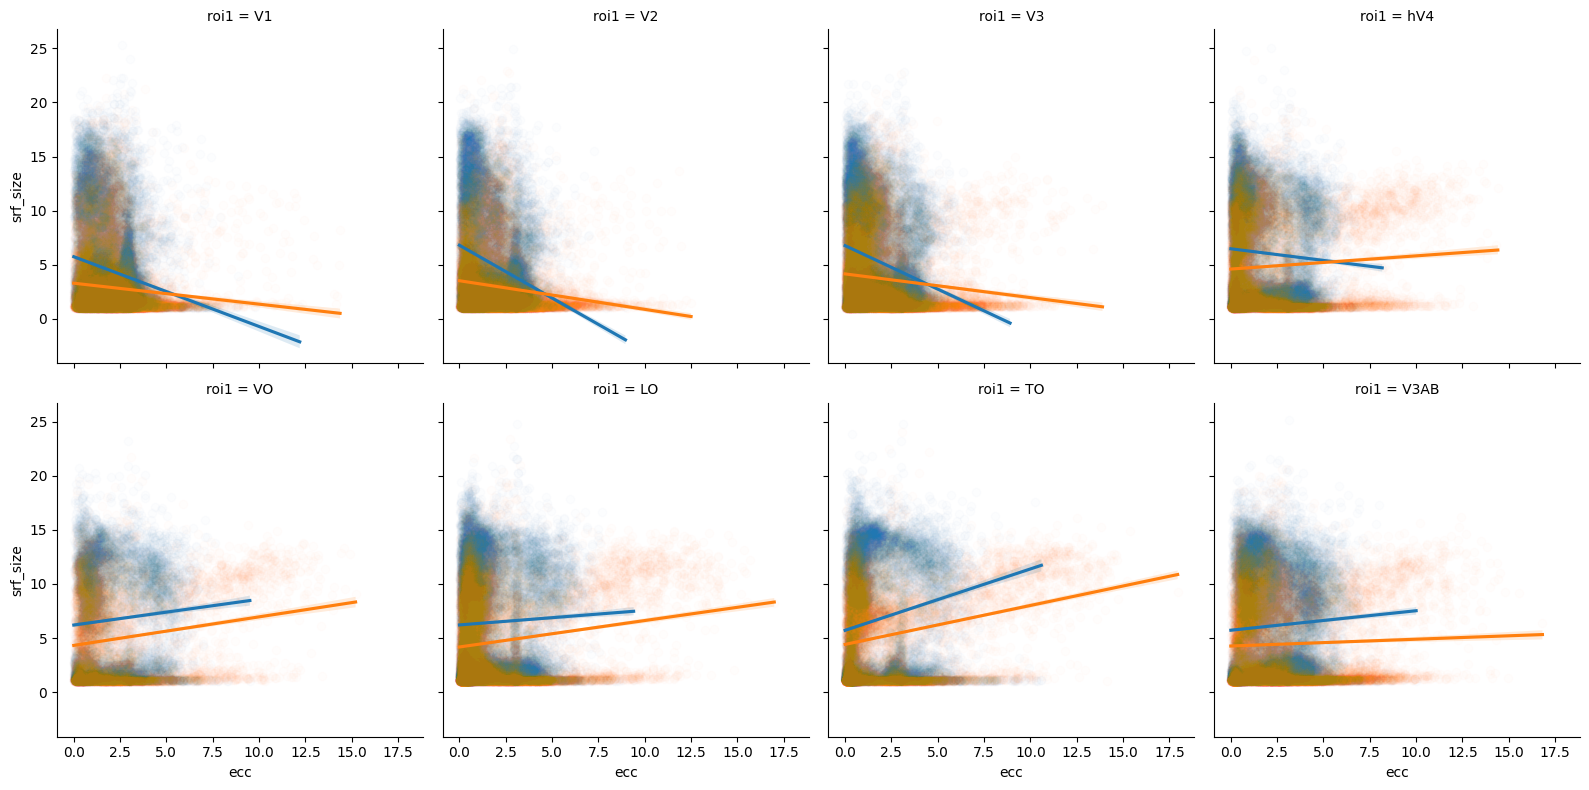

In [104]:
g = sns.FacetGrid(df.reset_index(), col="roi1", hue="model", height=4, aspect=1, col_wrap=4)

g.map(sns.regplot, "ecc", "srf_size", scatter_kws={'alpha':0.01})

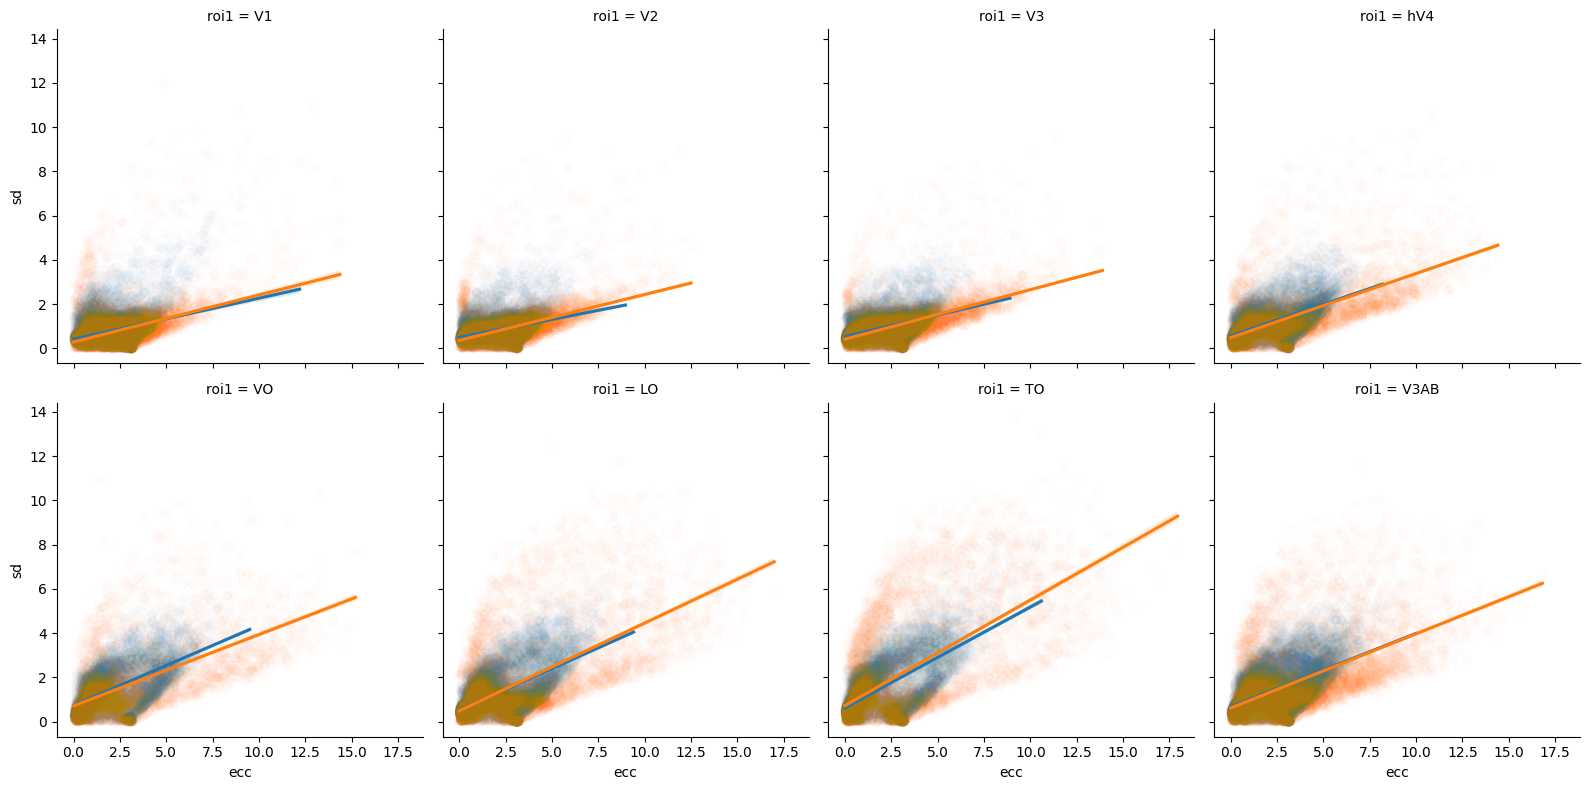

In [98]:
g = sns.FacetGrid(df.reset_index(), col="roi1", hue="model", height=4, aspect=1, col_wrap=4)

g.map(sns.regplot, "ecc", "sd", scatter_kws={'alpha':0.01})

(-3.0, 3.0)

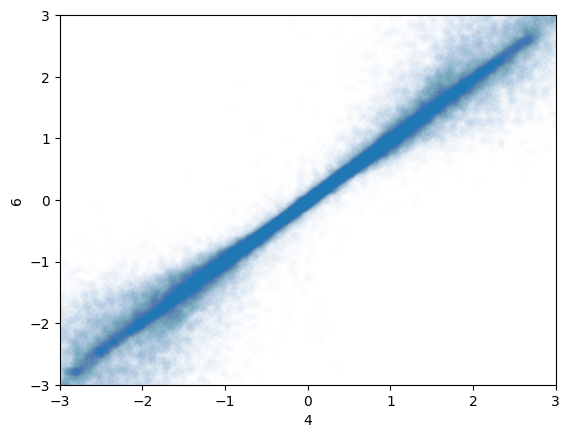

In [99]:
import matplotlib.pyplot as plt
tmp = df.set_index(['roi', 'voxel'], append=True).droplevel(2).unstack(['model'])


sns.scatterplot(x=tmp['x'][4], y=tmp['x'][6], alpha=0.01)

plt.xlim(-3, 3)
plt.ylim(-3, 3)

(0.0, 3.0)

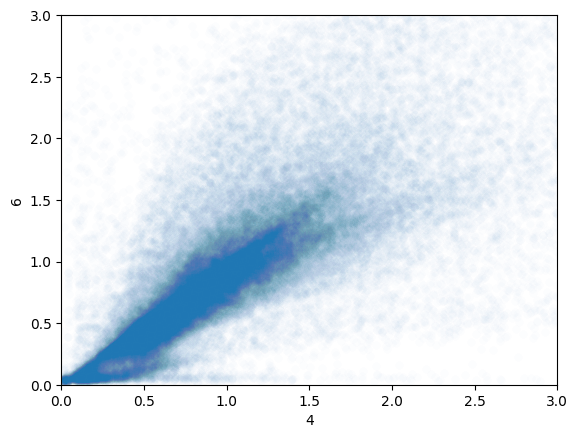

In [100]:
import matplotlib.pyplot as plt
tmp = df.set_index(['roi', 'voxel'], append=True).droplevel(2).unstack(['model'])


sns.scatterplot(x=tmp['sd'][4], y=tmp['sd'][6], alpha=0.01)

plt.xlim(0, 3)
plt.ylim(0, 3)

(0.0, 5.0)

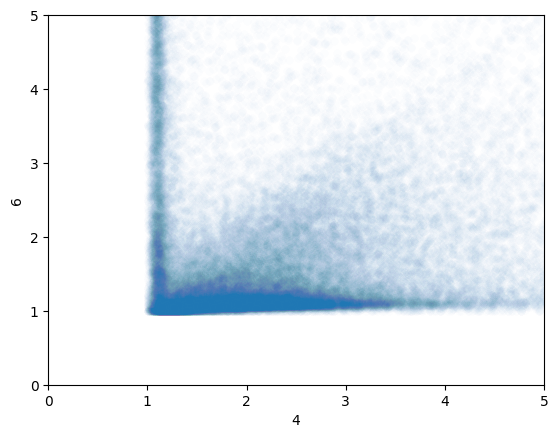

In [101]:
import matplotlib.pyplot as plt
tmp = df.set_index(['roi', 'voxel'], append=True).droplevel(2).unstack(['model'])


sns.scatterplot(x=tmp['srf_size'][4], y=tmp['srf_size'][6], alpha=0.01)

plt.xlim(0, 5)
plt.ylim(0, 5)

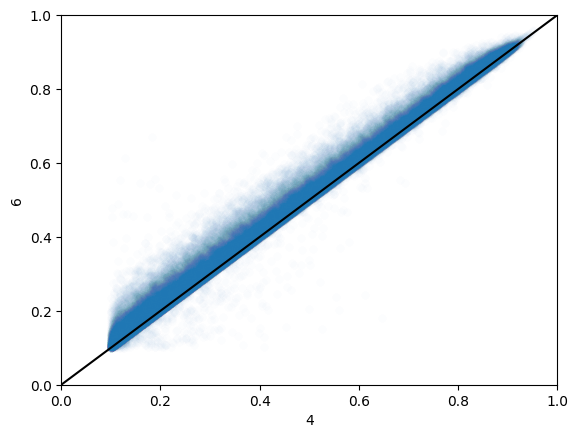

In [102]:
import matplotlib.pyplot as plt
tmp = df.set_index(['roi', 'voxel'], append=True).droplevel(2).unstack(['model'])


sns.scatterplot(x=tmp['r2'][4], y=tmp['r2'][6], alpha=0.01)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axline(xy1=(0,0 ), slope=1, color='k', linestyle='-')

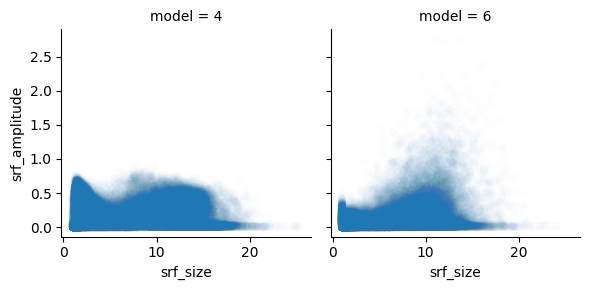

In [103]:
g = sns.FacetGrid(df.reset_index(),col='model', )

g.map_dataframe(sns.scatterplot, x='srf_size', y='srf_amplitude', edgecolor='none', alpha=0.01)